# Machine Learning for Healthcare

La predicción de la duración de la estancia puede resultar útil a los hospitales para gestionar el número limitado de camas.
Usaremos un conjunto de datos derivado del conjunto de datos MIMIC III.
Dado que nuestro modelo estima la duración de la estadía, estamos resolviendo un problema de regresión.

Importar todos los paquetes requeridos

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import pearsonr
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [2]:
# Leer los datos

df = pd.read_csv('task1.csv')

Demos una mirada en nuestros datos

In [3]:
# Chequear las primera filas de nuestro datasset
df.head()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
0,1.144444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0,1,0,0,0,1,0,0,0,0
1,5.496528,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,1,0,0,0,1,0,0,0,0
2,6.768056,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,...,0,1,0,0,0,1,0,0,0,0
3,2.856944,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,3.534028,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,0


Tenemos que asegurarnos de que cada columna sea de tipo de datos numéricos, es decir, float o int
Esto se debe a que los algoritmos requieren que los datos estén en ese formato para el entrenamiento.

In [4]:
# Echemos un vistazo en los tipos de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51037 entries, 0 to 51036
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LOS                         51037 non-null  float64
 1   blood                       51037 non-null  float64
 2   circulatory                 51037 non-null  float64
 3   congenital                  51037 non-null  float64
 4   digestive                   51037 non-null  float64
 5   endocrine                   51037 non-null  float64
 6   genitourinary               51037 non-null  float64
 7   infectious                  51037 non-null  float64
 8   injury                      51037 non-null  float64
 9   mental                      51037 non-null  float64
 10  misc                        51037 non-null  float64
 11  muscular                    51037 non-null  float64
 12  neoplasms                   51037 non-null  float64
 13  nervous                     510

Dado que todas las columnas son de tipo de datos numéricos,
Vemos las estadísticas descriptivas del conjunto de datos.

In [5]:
df.describe()

,LOS,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,AGE_newborn,AGE_senior,AGE_young_adult,MAR_DIVORCED,MAR_LIFE PARTNER,MAR_MARRIED,MAR_SEPARATED,MAR_SINGLE,MAR_UNKNOWN (DEFAULT),MAR_WIDOWED
count,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,...,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000,51037.000000
mean,10.228510,0.370711,2.260007,0.077121,0.617591,1.175030,0.503968,0.308502,2.362698,0.428963,...,0.157572,0.533103,0.079060,0.056136,0.000294,0.412916,0.010052,0.232929,0.188726,0.098948
std,12.461440,0.652278,2.255679,0.357821,1.119265,1.345073,0.845481,0.670549,2.206709,0.856638,...,0.364343,0.498908,0.269835,0.230186,0.017141,0.492363,0.099753,0.422702,0.391295,0.298595
min,0.014583,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.857639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.583333,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.805556,1.000000,4.000000,0.000000,1.000000,2.000000,1.000000,0.000000,3.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,294.660417,6.000000,16.000000,11.000000,11.000000,12.000000,7.000000,7.000000,23.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


La columna LOS es la variable objetivo que tenemos que predecir. <br>
Separe el conjunto de datos en dos. <br>
Uno con todas las variables independientes, otro con la variable objetivo.

In [6]:
# Variable de objetivo y características separadas
'''
LOS es el objetivo ,caracteristicas variables contiene variables independientes
'''
LOS = df["LOS"].values
features = df.drop(columns=['LOS'])

Por lo general, los conjuntos de datos contienen valores NA.
Comprobamos si nuestros datos contienen NA.<br>
Si hay NA, eliminamos esas filas o las llenamos con un valor (imputación)

In [7]:
# revisar por NaN's

df.isnull().values.sum()

0

Dado que no hay valores nulos, podemos dividir los datos.<br>
Dividimos los datos en conjuntos de datos de prueba y de tren.<br>
Por lo general, la división se realiza en una proporción de 80-20 o 70-30.<br>
Lo dividiremos 80-20.<br>
Usaremos el metodo sklearn.model_selection.train_test_split que importamos anteriormente.

In [8]:
# Dividimos los datos en training y testing

'''
test_size = 0.2
Esto significa que los test data es el 20% de todo dataset

random_state= 5

Esto significa que si se baraja el conjunto de datos antes de dividir.
Establecer random_state es equivalente a establecer una seede, esto se hace para que obtengamos el mismo 
resultado cada vez que ejecutamos el portátil.

'''

x_train,x_test,y_train,y_test = train_test_split(features,
                                                 LOS,
                                                test_size =.20,
                                                random_state= 0)


#Mostrar los resultados de la división

print('Training set tiene {} muestras.'.format(x_train.shape[0]))
print('Testing set tiene {} muestras. '.format(x_test.shape[0]))


Training set tiene 40829 muestras.
Testing set tiene 10208 muestras. 


## Machine Learning

*Entrenamos los siguientes algoritmos de machine learning para esta tarea:*

 - Linear Regression
 - Linear Regression optimized with Stochastic Gradient Descent(SGD)
 - Gradient Boosting
 - K-Nearest Neighbors
 - Random Forest
 - Support Vector Machine (SVM)
 
Esta celda puede demorarse 

# Comparación para modelos de regresión

models es una lista que contiene los objetos de los algoritmos de ML.<br>
results es un diccionario donde la clave es el nombre del algoritmo y el valor es MAE.<br>
Entrenamos para cada modelo y predecimos con  el test-set.<br>
Los MAE de cada modelo se almacenan en los resultados.


In [12]:
ml_models = [LinearRegression(),
            SGDRegressor(random_state=0),
            GradientBoostingRegressor(random_state=0),
            KNeighborsRegressor(),
            RandomForestRegressor(random_state= 0),
            SVR()]

results= {}

for model in ml_models:
    
    # Creamos instancias y ajustamos el modelo regresor
    reg_model = model
    reg_model.fit(x_train,y_train)
    
    #hacemos la prediccion con el modelo
    y_test_preds = reg_model.predict(x_test)
    
    # Obtenemos el nombre del modelo y almacenamos los resultados asociados con el modelo
    name = str(model).split("(")[0]
    
    results[name] = mean_absolute_error(y_test,y_test_preds)
    print('{} done.'.format(name))



LinearRegression done.
SGDRegressor done.
GradientBoostingRegressor done.
KNeighborsRegressor done.
RandomForestRegressor done.
SVR done.


In [13]:
print('Mean Absolute Error')
for i in results.keys():
    print('{}:{}'.format(i ,results[i]))

Mean Absolute Error
LinearRegression:6.093662890437919
SGDRegressor:6.446881916451007
GradientBoostingRegressor:5.587236700033559
KNeighborsRegressor:5.773035037878787
RandomForestRegressor:5.762952196367528
SVR:5.251454298258676


Visualizamos el MAE de los modelos.<br>
Trazamos una gráfica de barras para cada algoritmo.<br>
El eje y es MAE.

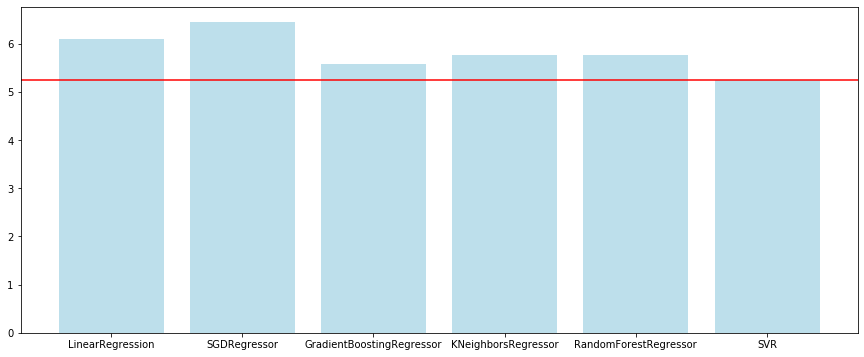

In [15]:
# graficar MAE

'''
Esta gráfica nos mostrará qué modelo tiene menor MAE
Obtenemos el menor MAE con Regresión SVM

'''

ind = range(len(results))
min_mae = min(results.values())

fig = plt.figure(figsize=(15,6))
ax = fig.subplots()
ax.bar(ind, list(results.values()), align='center',
      color ='lightblue',alpha=0.8)
plt.xticks(ind,results.keys())
ax.axhline(y=min_mae, xmin=0, xmax=100, ls='-',color='red')

plt.show()

*La regresión de SVM nos da el mínimo MAE de 5.25.*

# Deep Learning

In [16]:
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras import models, regularizers, layers, optimizers,losses,metrics
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


Entrenamos una red neuronal Feed Forward.

Primero inicializamos la red como modelo secuencial.
Agregamos capas de diferentes tipos y tamaños a este modelo secuencial.
Dado que este es un problema de regresión, usamos ReLu como función de activación para la capa de salida.

La forma de entrada de la capa de entrada es (número de columnas,).

Epochs es la cantidad de veces que se realiza el entrenamiento en todo el conjunto de datos. = 20.
Batch size es el número de filas que se entrenarán en una iteración. = 8.<br>
El error absoluto medio es la métrica utilizada para optimizar la pérdida.<br>
El dropout se utiliza para cerrar una proporción de nodos en la capa oculta en cada iteración. = 0,2.
El learning rate se utiliza para determinar cuánto salto se realizará durante el descenso de gradiente. = 10-4.

Los conjuntos de datos de validación y prueba son los mismos para esta tarea.

In [17]:
rows = x_train.shape[0]
cols = x_train.shape[1]
input_shape = (cols,)

Ese entrenamiento lleva una cantidad considerable de tiempo

In [22]:
# entrenando las red
model = models.Sequential()
model.add(layers.Dense(1024,activation='relu', kernel_regularizer=regularizers.l2(0.001),input_shape= input_shape))
#model.add(layers.BatchNormallization())
model.add(layers.Dense(1024,activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024,activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1024,activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))
print(model.summary())

# FIT/TRAIN modelo en el data training

NumEpochs = 20
BatchSize = 8

# Compilamos el modelo y ajústamos a los datos de entrenamiento

model.compile(optimizer= optimizers.Adam(lr=1e-4), loss='mean_absolute_error', metrics=['mae'])
history = model.fit(x_train,y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_test, y_test))

#predicciones en el data de testeo

results = model.evaluate(x_test, y_test)
print(""*100)
print("Test loss and MAE")
print("results", results)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              50176     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0

In [ ]:
El problema con las redes neuronales es que pueden hacer overfitting con los datos de entrenamiento.
Esto puede resultar en una mala estimación de los datos de prueba.
En este caso, la época 12 dio el menor MAE en el conjunto de prueba.

La red neuronal dio el mejor rendimiento de todos los modelos.